In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data

In [ ]:
yf.pdr_override()

start_date = '2020-01-01'
end_date = '2024-04-30'

samsung = data.get_data_yahoo('005930.KS',start_date,end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,49542.539062,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,49811.789062,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,49811.789062,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,50081.042969,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,50978.550781,23501171
...,...,...,...,...,...,...
2024-04-23,76400.0,76800.0,75500.0,75500.0,75500.000000,18717699
2024-04-24,77500.0,78800.0,77200.0,78600.0,78600.000000,22166150
2024-04-25,77300.0,77500.0,76300.0,76300.0,76300.000000,15549134


In [ ]:
df = pd.DataFrame({'ds':samsung.index,'y':samsung['Close']})
df.reset_index(inplace=True)
del df['Date']

In [ ]:
df

,ds,y
0,2020-01-02,55200.0
1,2020-01-03,55500.0
2,2020-01-06,55500.0
3,2020-01-07,55800.0
4,2020-01-08,56800.0
...,...,...
1061,2024-04-23,75500.0
1062,2024-04-24,78600.0
1063,2024-04-25,76300.0
1064,2024-04-26,76700.0


In [ ]:
!pip install statsmodels==0.11.1
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 24.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
from prophet import Prophet


In [ ]:

model = Prophet(yearly_seasonality=True,daily_seasonality=True)
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpkavitkl0/2qybscps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkavitkl0/3al9uqmp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48529', 'data', 'file=/tmp/tmpkavitkl0/2qybscps.json', 'init=/tmp/tmpkavitkl0/3al9uqmp.json', 'output', 'file=/tmp/tmpkavitkl0/prophet_modelibigg7im/prophet_model-20240501022258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:22:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:22:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_result = model.make_future_dataframe(periods=365)
result = model.predict(future_result)

In [ ]:
result

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,55239.730000,57157.244148,63082.098964,55239.730000,55239.730000,5004.007905,5004.007905,5004.007905,2297.54616,...,50.717212,50.717212,50.717212,2655.744533,2655.744533,2655.744533,0.0,0.0,0.0,60243.737905
1,2020-01-03,55151.372400,57410.638305,63406.085408,55151.372400,55151.372400,5224.746078,5224.746078,5224.746078,2297.54616,...,131.297752,131.297752,131.297752,2795.902166,2795.902166,2795.902166,0.0,0.0,0.0,60376.118478
2,2020-01-06,54886.299601,57655.284825,63554.087145,54886.299601,54886.299601,5550.400380,5550.400380,5550.400380,2297.54616,...,75.867543,75.867543,75.867543,3176.986677,3176.986677,3176.986677,0.0,0.0,0.0,60436.699981
3,2020-01-07,54797.942001,57588.100569,63419.243794,54797.942001,54797.942001,5775.829761,5775.829761,5775.829761,2297.54616,...,192.733653,192.733653,192.733653,3285.549949,3285.549949,3285.549949,0.0,0.0,0.0,60573.771763
4,2020-01-08,54709.584402,57541.996897,63402.836619,54709.584402,54709.584402,5803.857471,5803.857471,5803.857471,2297.54616,...,123.769191,123.769191,123.769191,3382.542120,3382.542120,3382.542120,0.0,0.0,0.0,60513.441872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,2025-04-25,83166.575330,62195.791719,109381.172665,59703.031722,107169.567068,2996.108208,2996.108208,2996.108208,2297.54616,...,131.297752,131.297752,131.297752,567.264295,567.264295,567.264295,0.0,0.0,0.0,86162.683537
1427,2025-04-26,83191.493095,61315.445722,109112.726155,59582.625565,107370.112389,2412.694748,2412.694748,2412.694748,2297.54616,...,-287.192727,-287.192727,-287.192727,402.341315,402.341315,402.341315,0.0,0.0,0.0,85604.187843
1428,2025-04-27,83216.410860,61490.551553,109749.858862,59451.289916,107459.764242,2255.476002,2255.476002,2255.476002,2297.54616,...,-287.192624,-287.192624,-287.192624,245.122466,245.122466,245.122466,0.0,0.0,0.0,85471.886862
1429,2025-04-28,83241.328625,61136.726835,109767.511421,59319.954267,107549.416094,2471.322980,2471.322980,2471.322980,2297.54616,...,75.867543,75.867543,75.867543,97.909277,97.909277,97.909277,0.0,0.0,0.0,85712.651605


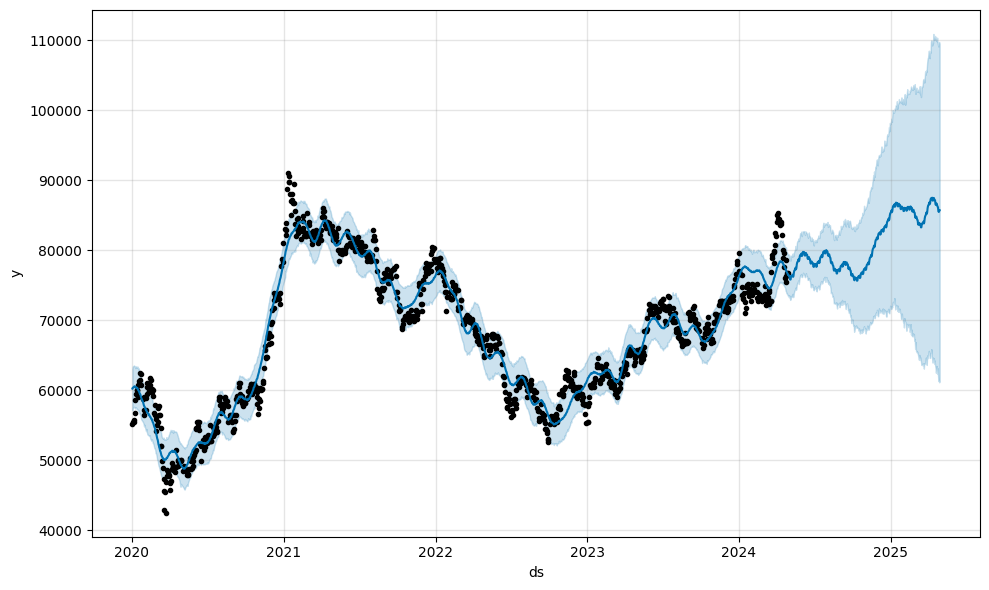

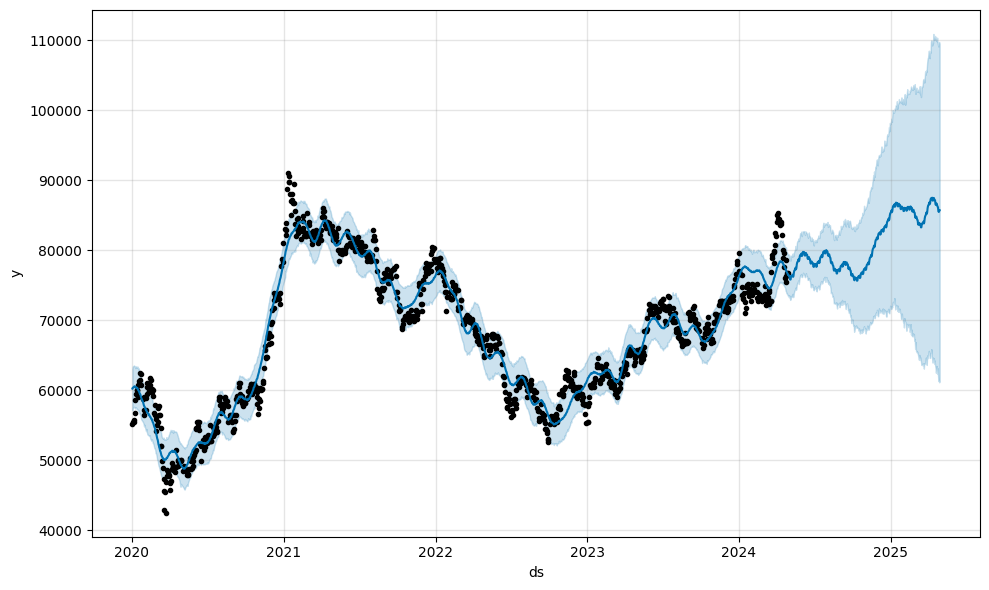

In [ ]:
model.plot(result)

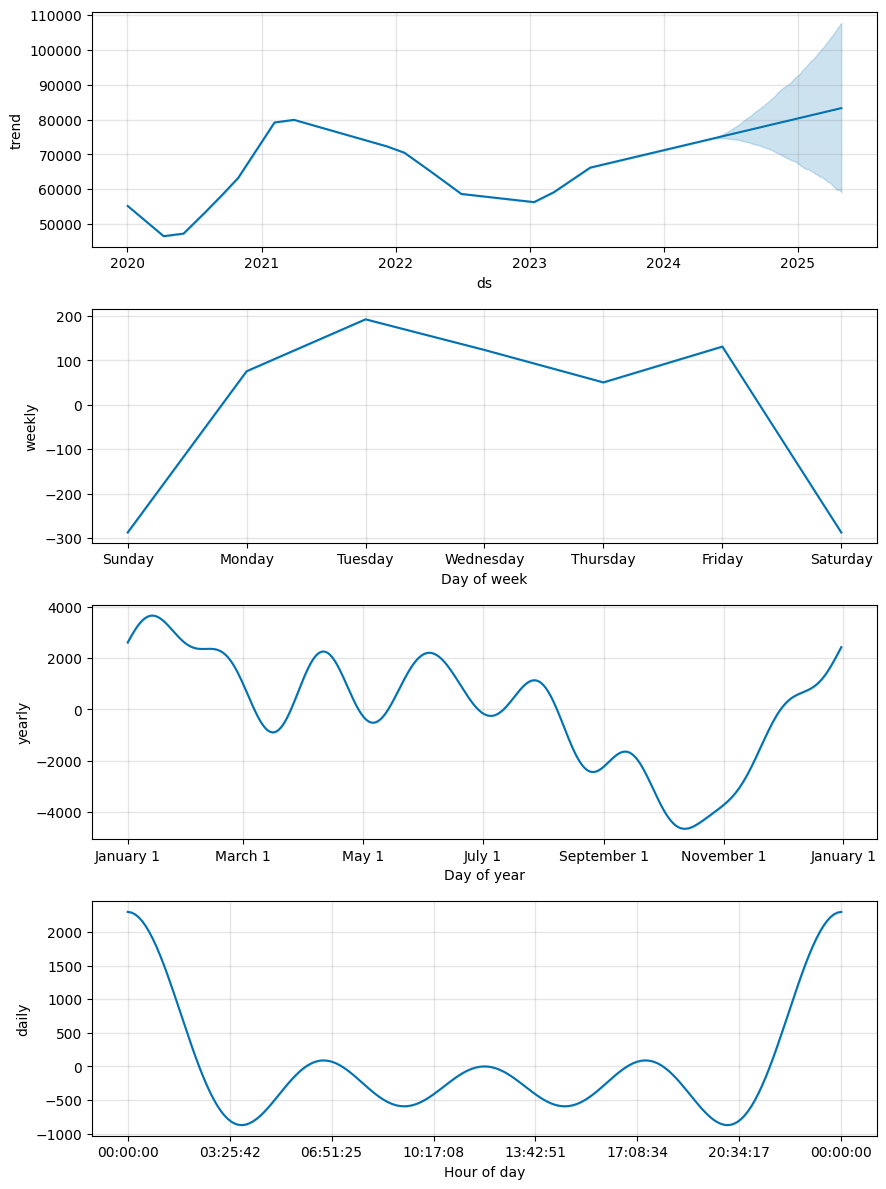

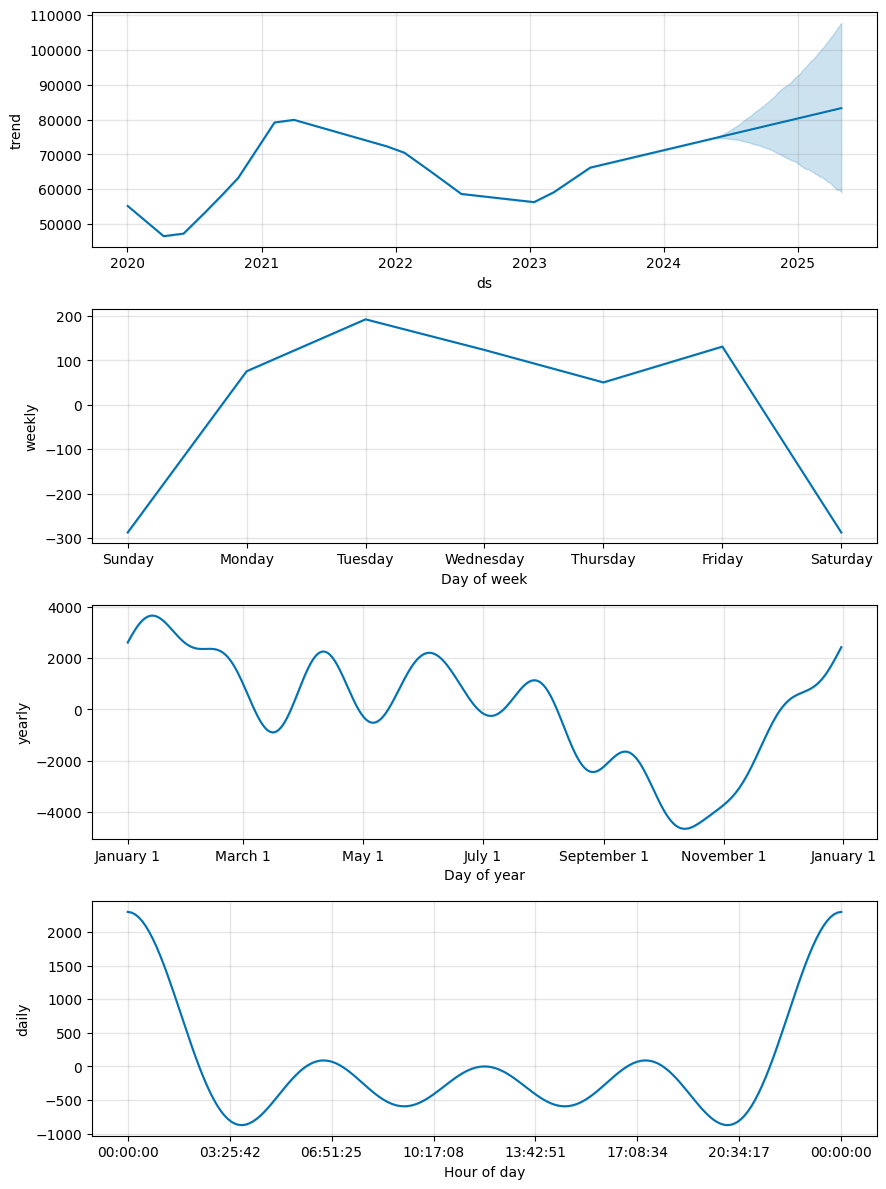

In [ ]:
model.plot_components(result)